<a href="https://colab.research.google.com/github/BaaaaCode/Kaggle/blob/main/%5BDACON_W13%5DElectirc_Car_V3_%EC%96%91%EB%B3%91%EB%B3%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. 기본 설정**

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [ ]:
# path 지정
path = '/content/gdrive/MyDrive/24-[DS Project] 2024 DS/[DACON]/[Dacon]-02-Electric Car/open (1)'

In [ ]:
# 라이브러리 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns

In [ ]:
# 경고문 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 데이터 불러오기
train_df = pd.read_csv(path + '/train.csv')
test_df = pd.read_csv(path + '/test.csv')

# **0. 한글 폰트 설정**

In [ ]:
# 1. 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,729 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124565 files and dire

In [ ]:
# 2. matplotlib 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 3. 폰트 캐시 삭제 ~ 4. 런타임 다시 시작
!rm ~/.cache/matplotlib -rf

In [ ]:
# 5. koreanize-matplotlib 라이브러리 사용
# 5번까지 해도 그래프가 깨지는 경우 6. Colab 세션 새로 시작, 7. matplotlib 업그레이드
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 49.7 MB/s eta 0:00:00


# **1. 데이터 확인**
1. 데이터 구조
    1. Frame: 11c*7497r(train)
    2. Null_count: 배터리용량 (2711)
    3. Data type: numerical(5), object(6)

2. Target Feature: 가격(백만원)
    1. 정비례: 차량상태, 배터리용량, 보증기간, 사고이력
    2. 반비례: 주행거리, 연식
    3. 불명: 제조사, 모델, 차량상태

In [ ]:
train_df.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


In [ ]:
train_df.describe(include='all')

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
count,7497,7497,7497,7497,4786.000000,7497,7497.000000,7497.000000,7497,7497.000000,7497.000000
unique,7497,7,21,3,NaN,3,NaN,NaN,2,NaN,NaN
top,TRAIN_0000,H사,ID4,Brand New,NaN,AWD,NaN,NaN,No,NaN,NaN
freq,1,1237,605,3380,NaN,5167,NaN,NaN,7154,NaN,NaN
mean,NaN,NaN,NaN,NaN,69.397187,NaN,44287.979458,4.960918,NaN,0.222489,62.331949
std,NaN,NaN,NaN,NaN,15.283635,NaN,55204.064386,3.155342,NaN,0.569232,36.646759
min,NaN,NaN,NaN,NaN,46.000000,NaN,3.000000,0.000000,NaN,0.000000,9.000000
25%,NaN,NaN,NaN,NaN,56.359000,NaN,5465.000000,2.000000,NaN,0.000000,34.390000
50%,NaN,NaN,NaN,NaN,68.125000,NaN,17331.000000,5.000000,NaN,0.000000,56.000000
75%,NaN,NaN,NaN,NaN,78.227000,NaN,61252.000000,8.000000,NaN,0.000000,80.050000


# **2. 데이터 전처리**
1. 결측치: 배터리 용량
    - 헤당 컬럼은 전기차 가격 예측이라는 문제에서 중요한 컬럼 중 하나이므로, 결측치 처리 방식에 대해 생각해볼 필요가 있음
        - 결측치 대체(KNN Imputaion)
        - 새로운 특성으로 대체(결측치 존재 유무: 0&1)

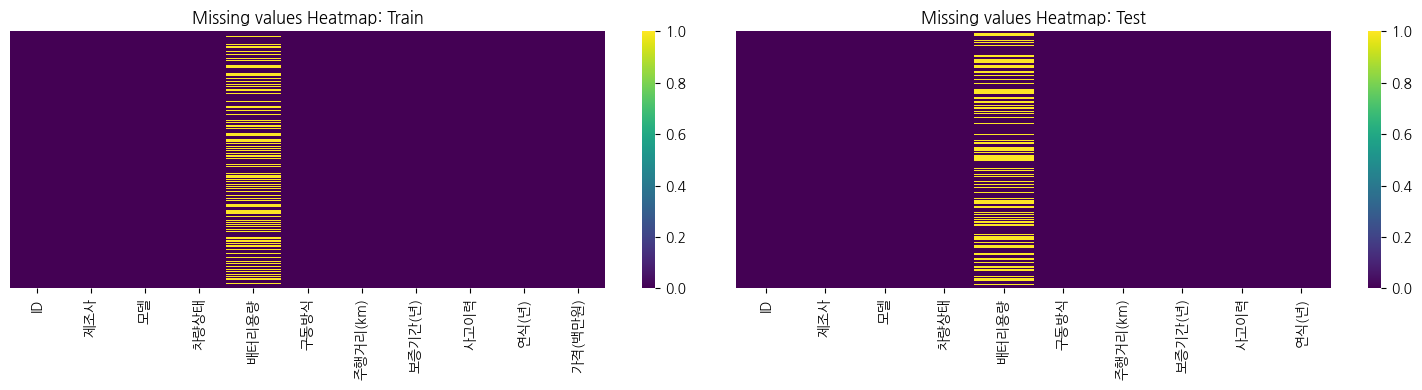

In [ ]:
missing_train = train_df.isnull()
missing_test = test_df.isnull()

fig, axes = plt.subplots(1,2, figsize=(15, 4))

sns.heatmap(missing_train, cmap='viridis', cbar=True, yticklabels=False ,ax=axes[0])
axes[0].set_title('Missing values Heatmap: Train')

sns.heatmap(missing_test, cmap='viridis', cbar=True, yticklabels=False, ax=axes[1])
axes[1].set_title('Missing values Heatmap: Test')

plt.tight_layout()
plt.show()


# **3. 데이터 시각화**
1. 목적
    1. 제조사, 모델에 따른 가격 변동 차이
    2. 성능(배터리용량, 구동방식)에 따른 가격 변동 차이
    3. 사용이력(주행거리, 사고이력, 연식, 차량상태)에 따른 가격 변동 차이
    4. 기타(보증기간)에 따른 가격 변동 차이

## **3.1 Target Feature**

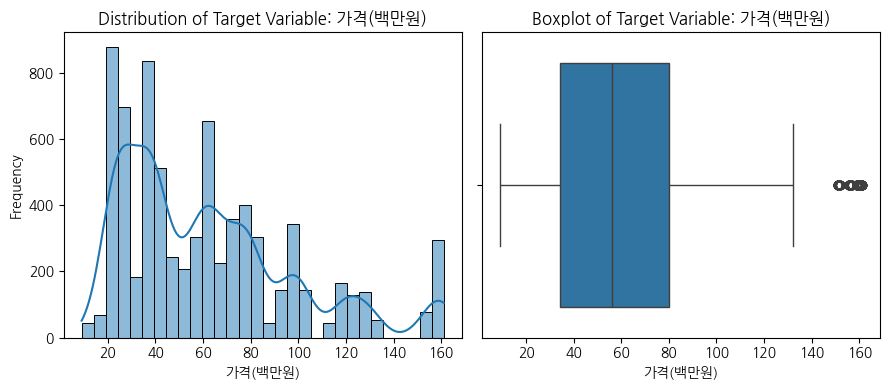

In [ ]:
# 목표 변수 추출
target_column = train_df['가격(백만원)']

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# histplot
sns.histplot(target_column, bins=30, kde=True, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Target Variable: 가격(백만원)')
axes[0].set_xlabel('가격(백만원)')
axes[0].set_ylabel('Frequency')

# boxplot
sns.boxplot(x=target_column, ax=axes[1])
axes[1].set_title('Boxplot of Target Variable: 가격(백만원)')

plt.tight_layout()
plt.show()

## **3.2 Numberical Data**
1. 각 변수 별 특징
    1. 배터리 용량: 특정 값에 몰려있음
    2. 주행거리: 주행거리가 0인 데이터가 절반, 그 외 데이터는 1000-5000 구간과 5000-20000 구간 사이에 고르게 형성되어 있음
    3. 보중기간: 특정 값에 몰려있음
    4. 연식: 대부분의 값이 0, 그 외 값은 1 또는 2의 값을 가짐

2. Train & Test: 각 feature별 분포가 유사함

3. 상관관계
    1. 가격과 각 변수간 상관관계: 가격과 상관관계가 있는 것으로 보이는 변수는 (1) 배터리용량(0.43), (2)보증기간(-0.35)임
    2. 특이사항: (1) 주행거리-보증기간(-0.66), (2) 주행거리-배터리용량(-0.58), (3) 배터리용량-보증기간(0.56)


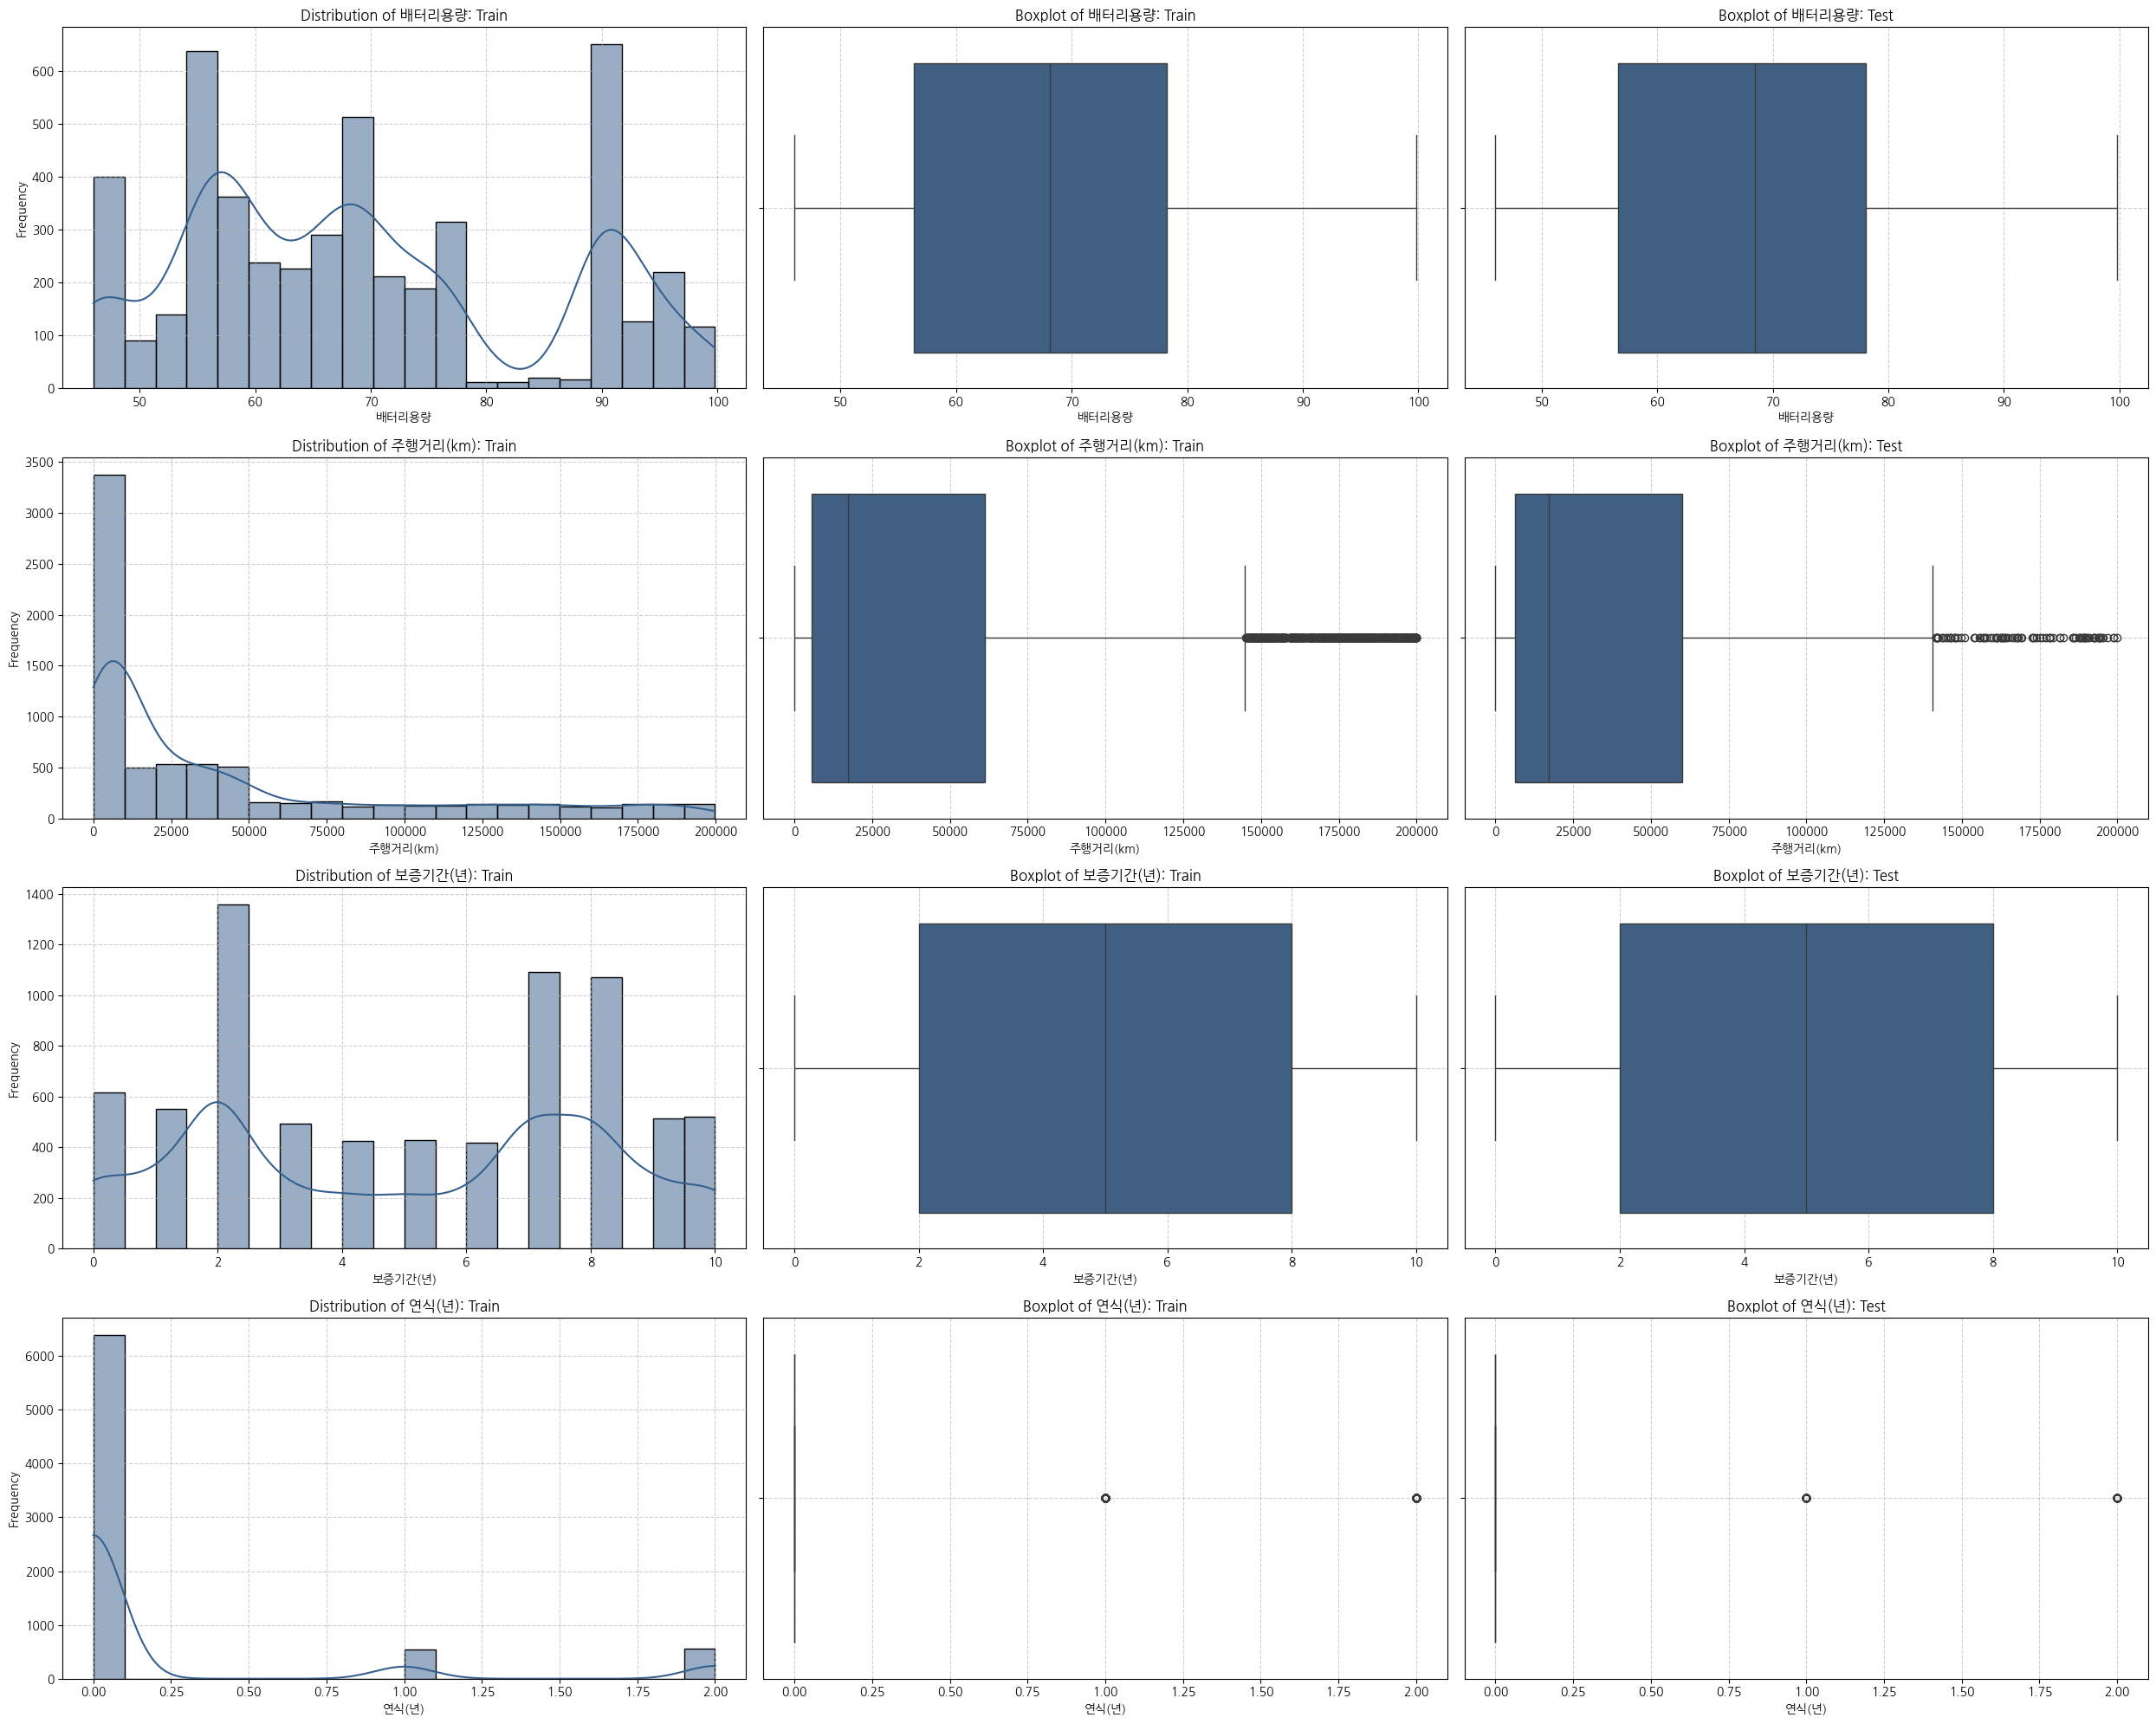

In [ ]:
# 수치형 데이터 분리
numerical_data = train_df.select_dtypes(include='number').columns.drop('가격(백만원)')

# cmap 설정
viridis_cmap = cm.get_cmap('viridis')
viridis_colors = [viridis_cmap(0.3), viridis_cmap(0.6), viridis_cmap(0.9)]

# plot
fig, axes = plt.subplots(len(numerical_data),3, figsize=(25, len(numerical_data)*5))

for i, column in enumerate(numerical_data):
    # hist of numerical
    sns.histplot(train_df[column], bins=20, kde=True, color=viridis_colors[0], ax=axes[i,0])
    axes[i,0].set_title(f"Distribution of {column}: Train")
    axes[i,0].set_xlabel(column)
    axes[i,0].set_ylabel("Frequency")
    axes[i,0].grid(visible=True, linestyle='--', alpha=0.6)

 # box of numerical: Train
    sns.boxplot(x=train_df[column], color=viridis_colors[0], ax=axes[i,1])
    axes[i,1].set_title(f"Boxplot of {column}: Train")
    axes[i,1].set_xlabel(column)
    axes[i,1].grid(visible=True, linestyle='--', alpha=0.6)

 # box of numerical: Test
    sns.boxplot(x=test_df[column], color=viridis_colors[0], ax=axes[i,2])
    axes[i,2].set_title(f"Boxplot of {column}: Test")
    axes[i,2].set_xlabel(column)
    axes[i,2].grid(visible=True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


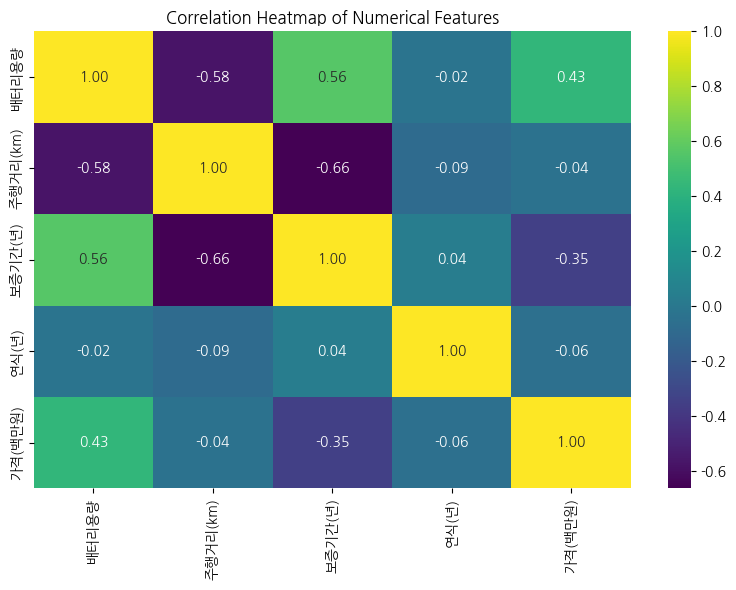

In [ ]:
numerical_corr = train_df.select_dtypes(include='number').corr()

plt.figure(figsize=(8,6))
sns.heatmap(numerical_corr, annot=True,fmt='.2f', cmap='viridis')

plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## **3.3 Categorical Data**

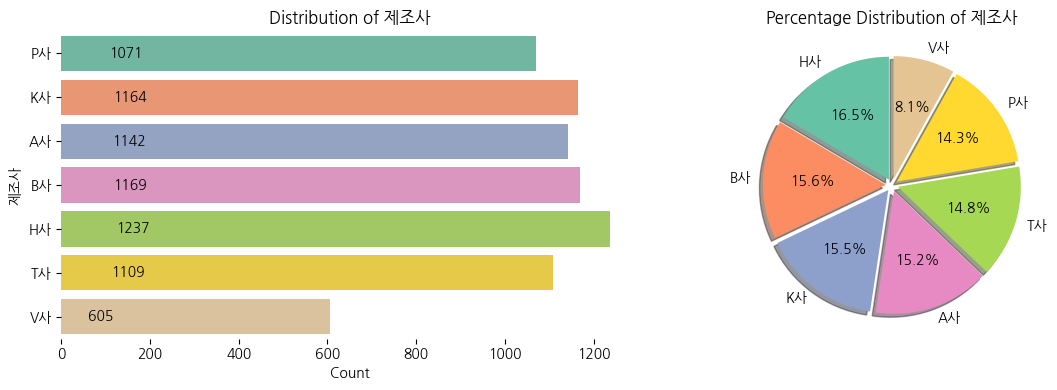

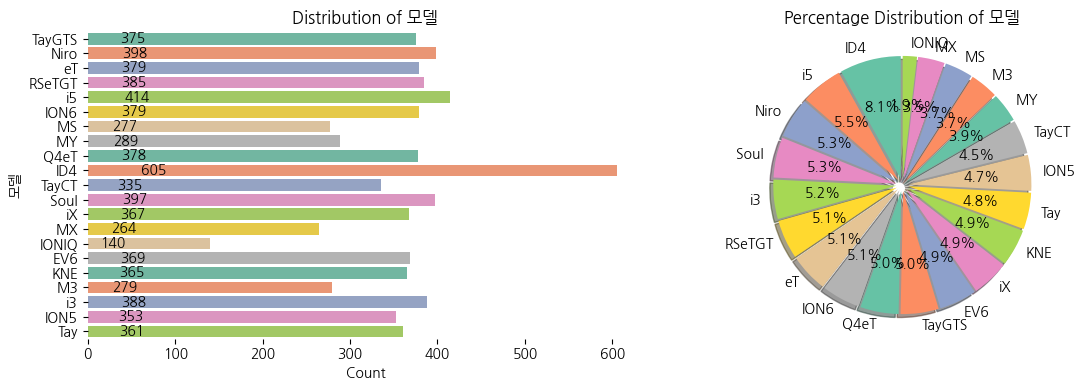

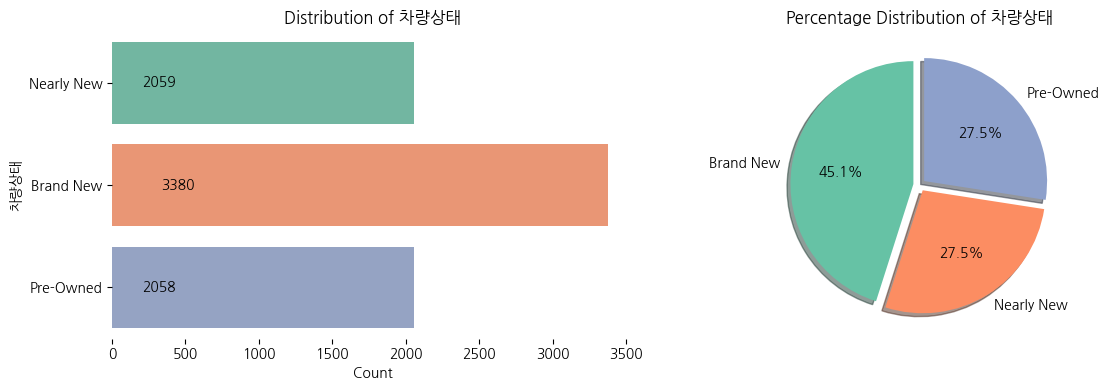

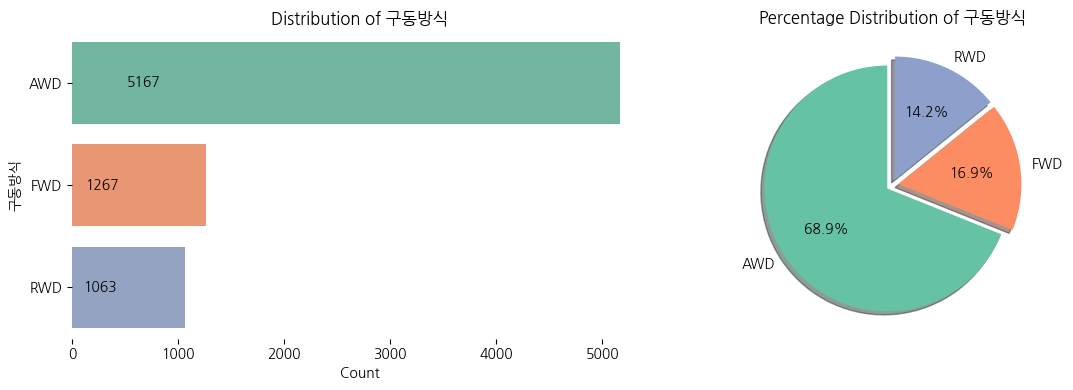

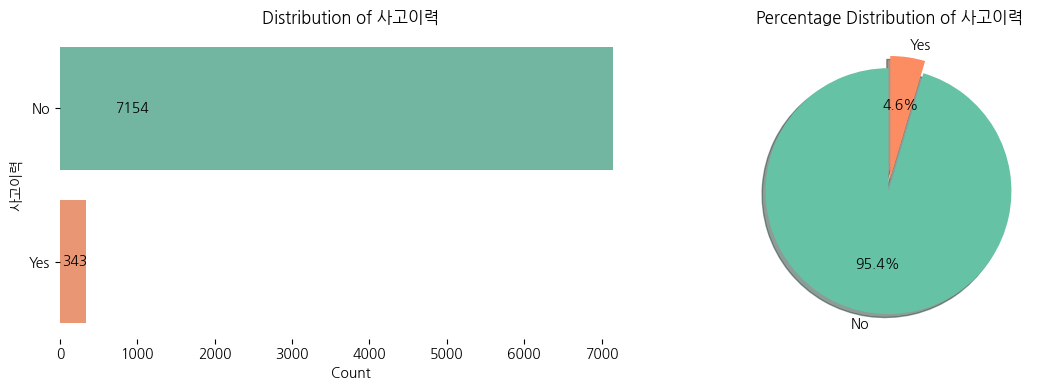

In [ ]:
def plot_categorical_distribution(data, column_name):
    plt.figure(figsize=(12, 4))

    # barplot of categorical
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=data, palette='Set2')
    plt.title(f"Distribution of {column_name}")
    plt.xlabel('Count')
    plt.ylabel(column_name)

    ax = plt.gca()

    for p in ax.patches:
        count = int(p.get_width())
        ax.annotate(f"{count}",
                    (p.get_width()*0.1, p.get_y()+p.get_height()/2),
                    ha='left', va='center', fontsize=10, color='black')
        sns.despine(left=True, bottom=True)

    # piechart for percetage distribution
    plt.subplot(1, 2, 2)
    data[column_name].value_counts().plot.pie(
        autopct="%1.1f%%", colors=sns.color_palette('Set2', data[column_name].nunique()),
        startangle=90, explode=[0.05]*data[column_name].nunique(), shadow=True
    )
    plt.title(f"Percentage Distribution of {column_name}")
    plt.ylabel("")

    plt.tight_layout()
    plt.show()

categorical_columns = ['제조사', '모델', '차량상태', '구동방식', '사고이력']

for column in categorical_columns:
    plot_categorical_distribution(train_df, column)

1. 각 변수별 특징
    1. 제조사: 범주 간 균등한 분포를 보임
    2. 모델: 범주 간 균등한 분포를 보임
    3. 차량상태: 새 것(Brand New)의 경우 45.1%, 거의 새 것의 경우 27.5%, 중고(Pre-Owned)의 경우 27.5%, 의 비율을 가짐. 즉, 새 차의 비중은 72.6%
    4. 구동방식: AWD(All Wheel Drive, 사륜) 68.9%, RWD(Rear Wheel Drive, 후륜) 14.2%, FWD(Front Wheel Drive) 16.9%
    5. 사고이력: NO(7154) 데이터가 대부분임. YES(343)


Summary Statistics for 가격 by 제조사:
           mean   median  count
제조사                            
A사    75.128354   69.840   1142
B사    55.212344   63.080   1169
H사    31.312991   34.830   1237
K사    30.779029   27.555   1164
P사   131.990934  128.600   1071
T사    70.153724   72.710   1109
V사    38.411702   39.560    605


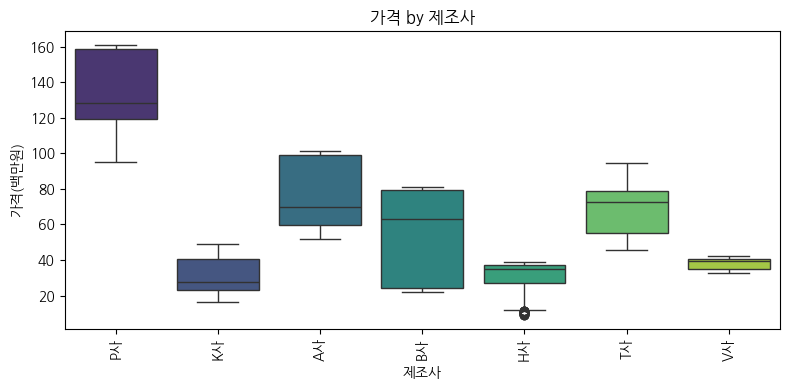


Summary Statistics for 가격 by 모델:
              mean   median  count
모델                                
EV6      44.202493   41.690    369
ID4      38.411702   39.560    605
ION5     35.070142   35.000    353
ION6     38.104855   38.000    379
IONIQ    17.991500   17.895    140
KNE      25.736603   27.090    365
M3       51.632867   52.790    279
MS       74.538195   75.630    277
MX       83.045455   84.395    264
MY       72.054775   74.370    289
Niro     26.970779   27.635    398
Q4eT     58.068836   58.980    378
RSeTGT   98.801195   99.780    385
Soul     22.120151   22.570    397
Tay     109.932188  114.400    361
TayCT   126.312657  128.200    335
TayGTS  158.298747  159.890    375
eT       68.095251   69.710    379
i3       23.561108   23.500    388
i5       62.873382   63.270    414
iX       80.032534   80.060    367


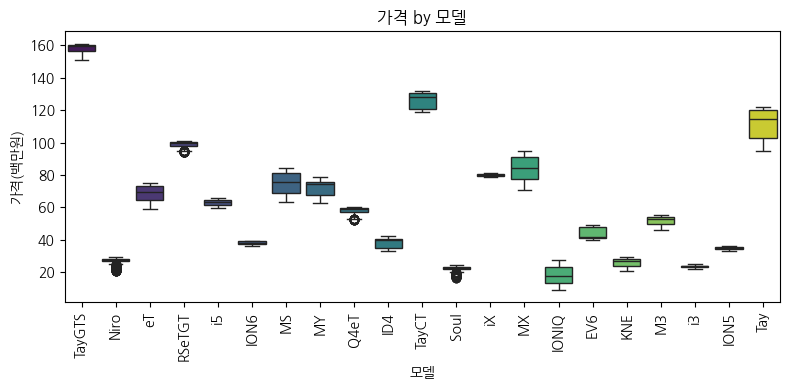


Summary Statistics for 가격 by 차량상태:
                 mean  median  count
차량상태                                
Brand New   65.092287  59.980   3380
Nearly New  60.497742  52.710   2059
Pre-Owned   59.633547  51.125   2058


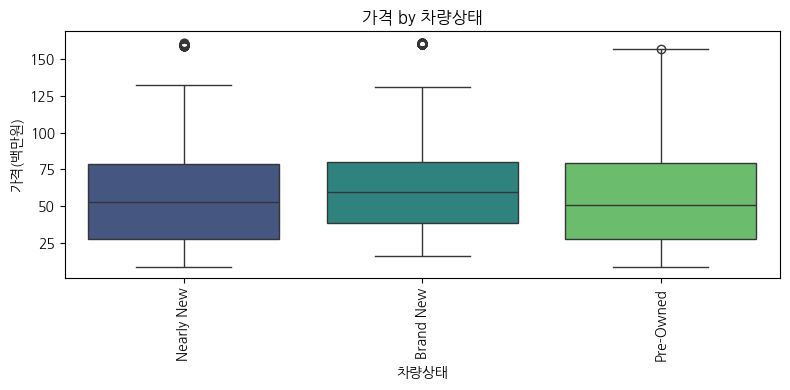


Summary Statistics for 가격 by 구동방식:
           mean  median  count
구동방식                          
AWD   72.293408   64.81   5167
FWD   28.112573   27.05   1267
RWD   54.697977   59.80   1063


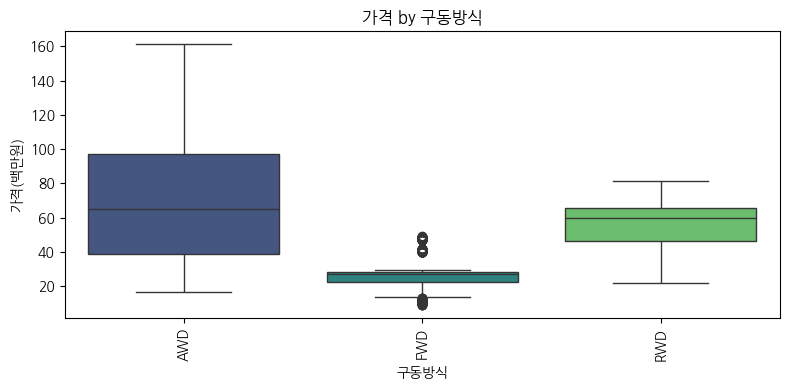


Summary Statistics for 가격 by 사고이력:
           mean  median  count
사고이력                          
No    62.294824   55.99   7154
Yes   63.106268   58.49    343


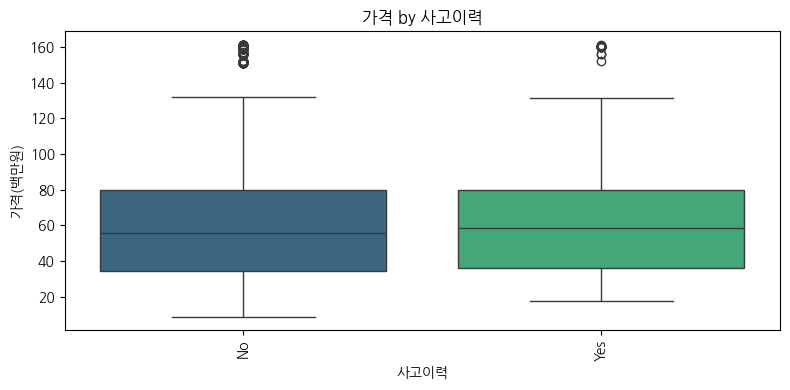

In [ ]:
categorical_columns = ['제조사', '모델', '차량상태', '구동방식', '사고이력']

for column in categorical_columns:
    stats = train_df.groupby(column)['가격(백만원)'].agg(['mean', 'median', 'count'])
    print(f"\nSummary Statistics for 가격 by {column}:")
    print(stats)

    plt.figure(figsize=(8,4))
    sns.boxplot(data=train_df, x=column, y='가격(백만원)', palette='viridis')
    plt.title(f"가격 by {column}")
    plt.xlabel(column)
    plt.ylabel('가격(백만원)')
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

1. 각 변수 별 특징
    1. 제조사
    * (median 기준) P사-T사-A사-B사-V사-H사-K사 순으로 가격대가 높음
    * (Group) group 1: P사, group 2: A사, T사, group 3: B사, group 4: K사, H사, V사
    2. 모델
    3. 차량상태: Brand New의 가격이 높게 형성되고 있으며,  Nearly New와 Pre-Owned 간 가격차이는 크게 나지 않음
    4. 구동방식: AWD 형식의 차량은 가격이 범위가 넓음. FWD의 경우 가격대가 낮게 형성됨
    5. 사고이력: 사고이력이 있는 차량과 없는 차량간 가격차이는 크게 나지 않음

2. 이상치 처리
    1. boxplot 상 드러나는 이상치의 처리 방법이 마땅치 않음. 이상치라고 보기도 애매한 것이 특정 지점에 과도하게 몰려있는 양상을 보이는데 이를 이상치로 처리한다면 모델 예측에 악영향을 미칠 것이라고 판단됨.

EV6: 기아
ID4: 폭스바겐
ION5: 현대
ION6: 현대
IONIQ: 현대
KNE: 기아
M3: 테슬라
MS: 테슬라
MX: 테슬라
MY: 테슬라
Niro: 기아
Q4eT: 아우디
RSeTGT: 포르쉐
Soul: 기아
Tay: 포르쉐
TayCT: 포르쉐
TayGTS: 포르쉐
eT: 아우디
i3: BMW
i5: BMW
iX: BMW

## **3.4 etc**
1. 제조사, 모델, 구동방식에 따른 배터리 용량 차이

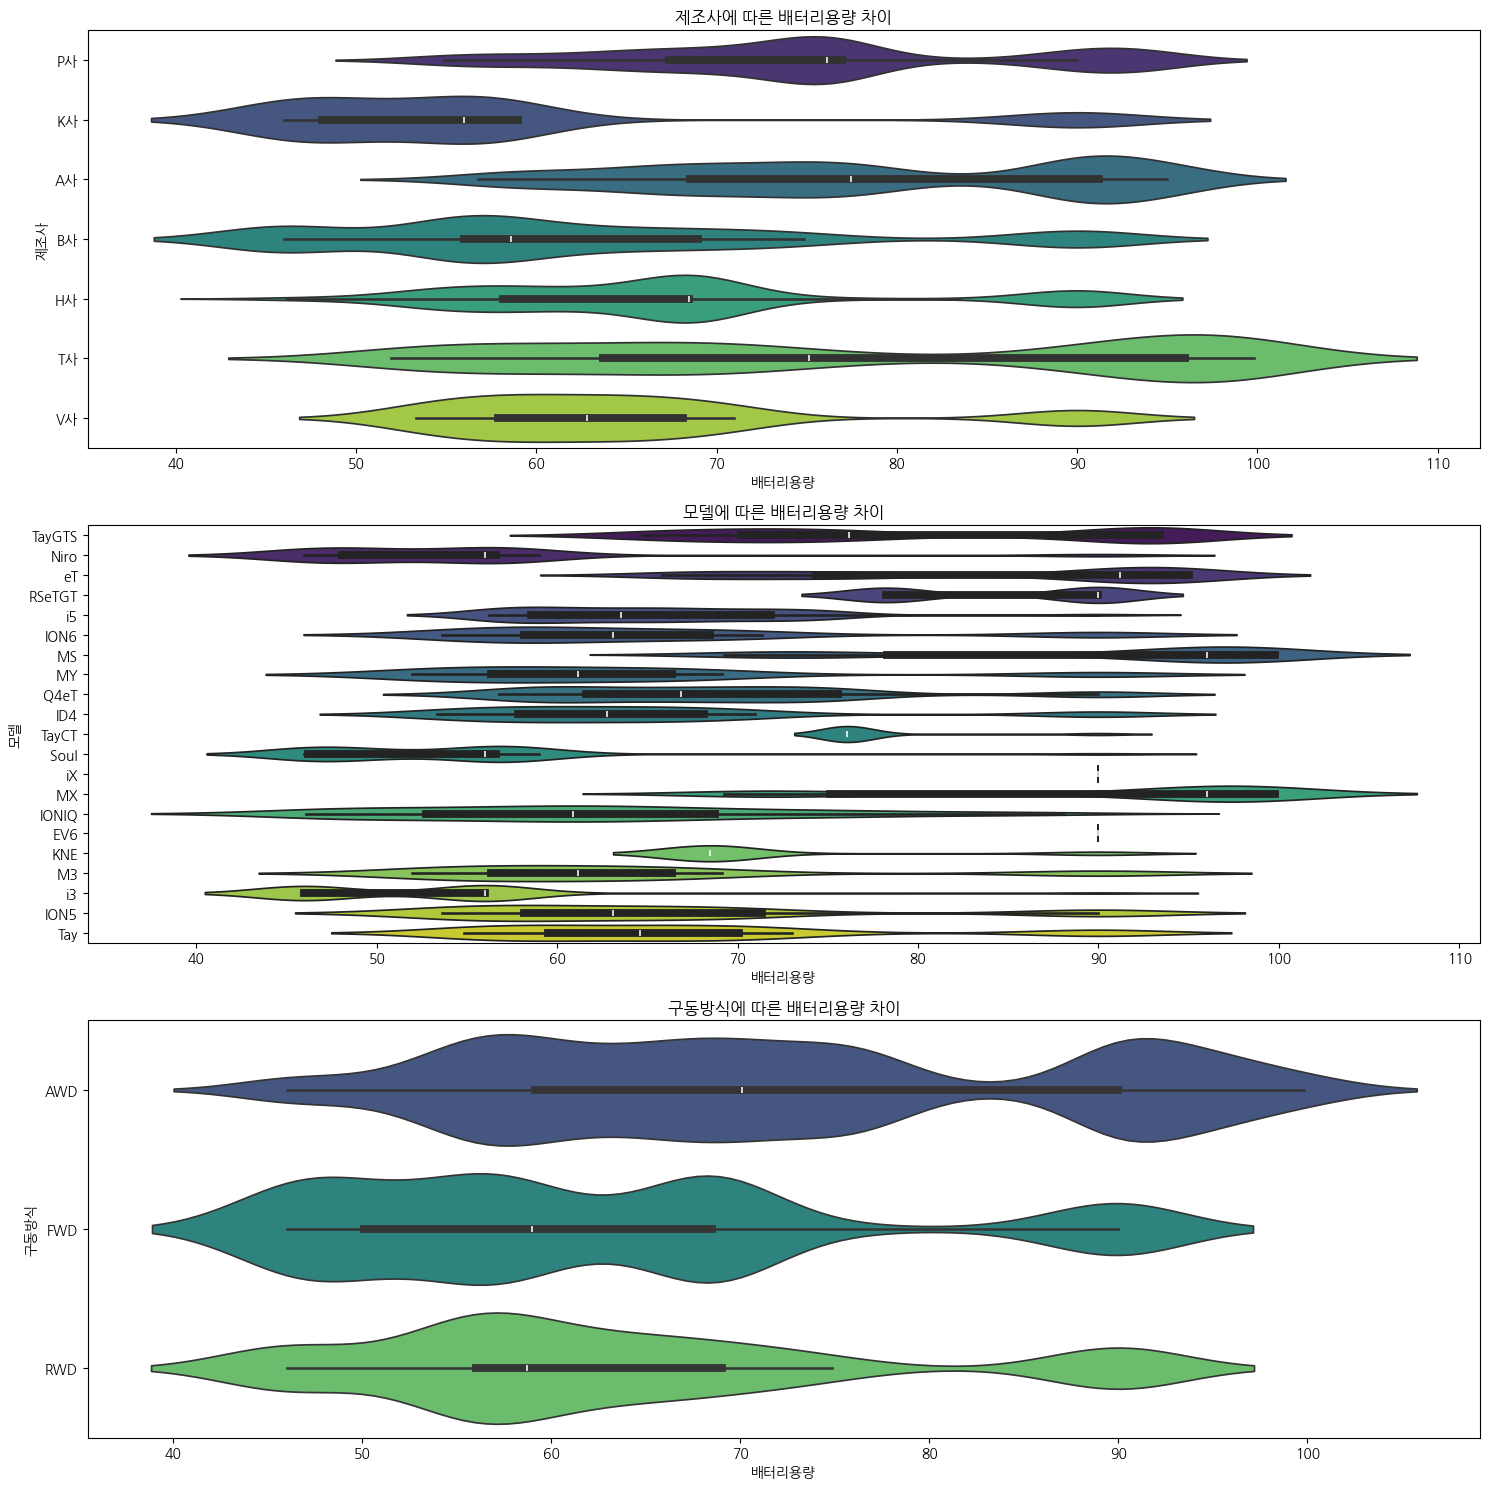

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15,15))

for i, column in enumerate(['제조사', '모델', '구동방식']):
    sns.violinplot(data=train_df, x='배터리용량', y=column, palette='viridis', ax=axes[i])
    axes[i].set_xlabel('배터리용량')
    axes[i].set_ylabel(column)
    axes[i].set_title(f"{column}에 따른 배터리용량 차이")

plt.tight_layout()
plt.show()

-----

# **4. 데이터 전처리(2차)**

### 배터리 용량(KNN Imputor)



In [ ]:
train_df['배터리용량_결측치'] = train_df['배터리용량'].isnull().astype(int)
test_df['배터리용량_결측치'] = test_df['배터리용량'].isnull().astype(int)

In [ ]:
# 배터리 용량 전처리
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

pipeline = Pipeline([
    ('scaler', StandardScaler()), # 또는 MinMaxScaler()
    ('imputer', KNNImputer())
])

param_grid = {
    'imputer__n_neighbors' : [10, 20, 30]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error') # 5-fold cross-validation
grid_search.fit(train_df[['배터리용량']])

best_imputer = grid_search.best_estimator_

In [ ]:
best_imputer

Pipeline(steps=[('scaler', StandardScaler()),
                ('imputer', KNNImputer(n_neighbors=10))])

In [ ]:
# train_df의 '배터리용량' 결측치 대체
train_df['배터리용량'] = best_imputer.fit_transform(train_df[['배터리용량']])

# test_df의 '배터리용량' 결측치 대체 (train 데이터에서 계산된 값 사용)
test_df['배터리용량'] = best_imputer.transform(test_df[['배터리용량']])

### 범주형 데이터(One-Hot Encoding or Label Encoding)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for array output
encoded_data = encoder.fit_transform(train_df[['제조사', '모델', '차량상태', '구동방식', '사고이력']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['제조사', '모델', '차량상태', '구동방식', '사고이력']))
train_df = pd.concat([train_df, encoded_df], axis=1)
test_df = pd.concat([test_df, encoded_df], axis=1)

# 기존 컬럼 삭제
column_to_drop = ['제조사', '모델', '차량상태', '구동방식', '사고이력']
train_df.drop(column_to_drop, axis=1, inplace=True)
test_df.drop(column_to_drop, axis=1, inplace=True)

### 수치형 데이터(MinMaxScaler or StandardScaler)

In [ ]:
scaler = StandardScaler()

train_df[['주행거리(km)', '보증기간(년)', '연식(년)']] = scaler.fit_transform(train_df[['주행거리(km)', '보증기간(년)', '연식(년)']])
test_df[['주행거리(km)', '보증기간(년)', '연식(년)']] = scaler.fit_transform(test_df[['주행거리(km)', '보증기간(년)', '연식(년)']])

In [ ]:
train_df

,ID,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원),배터리용량_결측치,제조사_A사,제조사_B사,제조사_H사,...,모델_i5,모델_iX,차량상태_Brand New,차량상태_Nearly New,차량상태_Pre-Owned,구동방식_AWD,구동방식_FWD,구동방식_RWD,사고이력_No,사고이력_Yes
0,TRAIN_0000,1.091465e+00,-0.555177,-1.572333,3.122858,159.66,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,TRAIN_0001,-8.766623e-01,-0.617550,0.329331,-0.390885,28.01,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,TRAIN_0002,1.426695e+00,-0.759541,0.646275,-0.390885,66.27,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,TRAIN_0003,5.715816e-16,-0.409508,-0.621501,-0.390885,99.16,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,TRAIN_0004,-5.483029e-01,2.426016,-1.255389,-0.390885,62.02,0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,TRAIN_7492,5.715816e-16,-0.733962,1.597107,-0.390885,35.95,1,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7493,TRAIN_7493,-1.531025e+00,1.650768,-0.938445,-0.390885,23.40,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7494,TRAIN_7494,5.715816e-16,-0.777621,-0.938445,-0.390885,120.00,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7495,TRAIN_7495,-8.766623e-01,-0.087735,0.329331,3.122858,24.00,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


-------------

# **5. 모델링**

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X = train_df.drop(['가격(백만원)', 'ID'], axis=1)
y = train_df['가격(백만원)']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor

# 모델 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 모델 평가
y_pred_rf = model.predict(X_val)
mse_rf = mean_squared_error(y_val, y_pred_rf) # squared 인수 제거
rmse_rf = np.sqrt(mse_rf)
print(f"RMSE: {rmse_rf}")

RMSE: 1.5561795088296195


In [ ]:
# Gradient Boosting Machined
from sklearn.ensemble import GradientBoostingRegressor

# 모델 학습
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# 모델 평가
y_pred_gbm = model.predict(X_val)
mse_gbm = mean_squared_error(y_val, y_pred_gbm)
rmse_gbm = np.sqrt(mse_gbm)
print(f"RMSE: {rmse_gbm}")

RMSE: 2.8047536268910087


In [ ]:
# XGBoost
from xgboost import XGBRegressor

# 모델 학습
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# 모델 평가
y_pred_xgb = model.predict(X_val)
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print(f"RMSE: {rmse_xgb}")

RMSE: 1.7004191876462842


In [ ]:
# LightGBM
from lightgbm import LGBMRegressor

# 모델 학습
model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

# 모델 평가
y_pred_lgbm = model.predict(X_val)
mse_lgbm = mean_squared_error(y_val, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
print(f"RMSE: {rmse_lgbm}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 5997, number of used features: 41
[LightGBM] [Info] Start training from score 62.221487
RMSE: 1.3885442878374117


              Model      RMSE
3          LightGBM  1.388544
0      RandomForest  1.556180
2           XGBoost  1.700419
1  GradientBoosting  2.804754


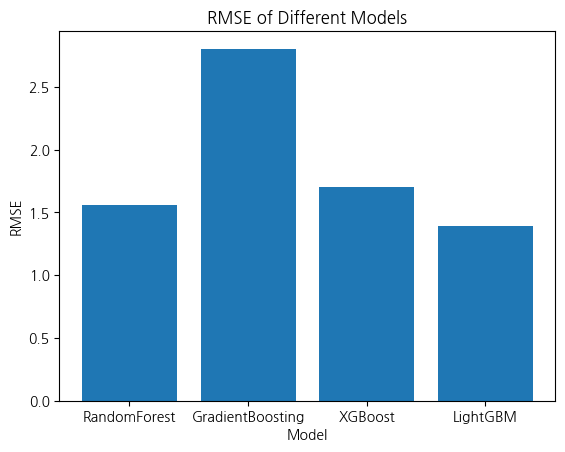

In [ ]:
# RMSE
model = ['RandomForest', 'GradientBoosting', 'XGBoost', 'LightGBM']
rmse_values = [rmse_rf, rmse_gbm, rmse_xgb, rmse_lgbm]

# DF
df = pd.DataFrame({'Model': model, 'RMSE': rmse_values})
df = df.sort_values(by='RMSE', ascending=True)

print(df)

# plot
# plt.figure(figsize=(10,6))

plt.bar(model, rmse_values)
plt.title('RMSE of Different Models')
plt.xlabel('Model')
plt.ylabel('RMSE')

plt.show()

In [ ]:
# submission
test_df['가격(백만원)'] = prediotions

submission = test_df[['ID', '가격(백만원)']]

submission.to_csv('/content/gdrive/MyDrive/24-[DS Project] 2024 DS/[DACON]/[Dacon]-02-Electric Car/submission_lgbm.csv', index=False)


In [ ]:
submission

,ID,가격(백만원)
0,TEST_000,159.369695
1,TEST_001,26.235134
2,TEST_002,71.409604
3,TEST_003,100.114762
4,TEST_004,64.933422
...,...,...
7492,NaN,35.632888
7493,NaN,25.703893
7494,NaN,126.753509
7495,NaN,25.817658
